In [2]:
from scipy import io

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
file = r"../../Desktop/FullBody/data/foot/CG002_M_1/front.mat" #plantar foot
file = r"../../Downloads/H_0025.mat" # standup foot
file = r"../../Desktop/FullBody/data/breast/1004/front.mat"
img = io.loadmat(file)['mappedTemperatureImage']

file = r"../../Downloads/FLIR0236.csv"
file = r"../../Downloads/IR_2016-09-19_0022.csv"
file = r"../../Downloads/IR_2016-10-31_0041.csv"
file = r"../../Desktop/old/Onchocerciasis/Analysis/Data/Phase0/TestData/CSV/FLIR0314.csv"
img = pd.read_csv(file,header=None).values

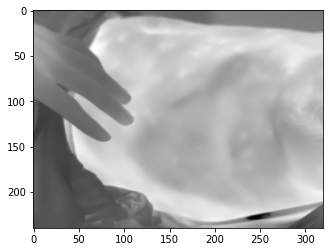

In [62]:
plt.figure()
plt.imshow(img,cmap='gray')
# plt.clim(23.87,)

In [63]:
import numpy as np
from thermal_dicom import ThermalDicom, ThermalViewer

# Create thermal DICOM
thermal_dicom = ThermalDicom()
thermal_dicom.set_thermal_image(img, img, (img[img>0].min(), img.max()))

# Set thermal parameters
thermal_params = {
    'emissivity': 0.98,           # Human skin emissivity
    'distance_from_camera': 1.0,  # 1 meter from camera
    'ambient_temperature': 22.0,  # Room temperature
    'relative_humidity': 45.0,    # 45% humidity
    'camera_model': 'FLIR E8-XT'
}
thermal_dicom.set_thermal_parameters(thermal_params)

# Create standard medical thermal DICOM
thermal_dicom.create_standard_thermal_dicom(
    patient_name="Chest",
    patient_id="THEM008",
    study_description="Medical Thermal Imaging"
)

# Save DICOM file
thermal_dicom.save_dicom('thermal_image.dcm')

# Create interactive visualization
viewer = ThermalViewer(thermal_dicom)
fig = viewer.create_interactive_plot(title="Interactive Thermal Image")

# Get temperature at specific pixel (with hover functionality)
temp = thermal_dicom.get_temperature_at_pixel(140, 256)
print(f"Temperature at center: {temp:.2f}°C")

Temperature at center: 26.23°C


In [ ]:
for name in ["front","left_lat","left_obl","right_lat","right_obl"]:
    file = r"../../Desktop/FullBody/data/breast/1004/" + name + ".mat"
    img = io.loadmat(file)['mappedTemperatureImage']
    # Create thermal DICOM
    thermal_dicom = ThermalDicom(organization_uid_prefix="BT")
    thermal_dicom.set_thermal_image(img, img, (img[img>0].min(), img.max()))

    # Set thermal parameters
    thermal_params = {
        'emissivity': 0.98,           # Human skin emissivity
        'distance_from_camera': 1.0,  # 1 meter from camera
        'ambient_temperature': 22.0,  # Room temperature
        'relative_humidity': 45.0,    # 45% humidity
        'camera_model': 'FLIR E8-XT'
    }
    thermal_dicom.set_thermal_parameters(thermal_params)
    thermal_dicom.dataset.

    # Create standard medical thermal DICOM
    thermal_dicom.create_standard_thermal_dicom(
        patient_name="Chest",
        patient_id="THEM008",
        study_description="Medical Thermal Imaging"
    )

    # Save DICOM file
thermal_dicom.save_dicom('thermal_image.dcm')
